## Introduction to Numerical Computing with NumPy

#### Heavily Inspired by Jake VanderPlas's [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/)

### Array representation

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# config retina mode
%config InlineBackend.figure_format = 'retina'

In [2]:
img_path = "../datasets/images/street.jpg"
img = Image.open(img_path)

In [3]:
img_array = np.array(img).astype(np.uint8)

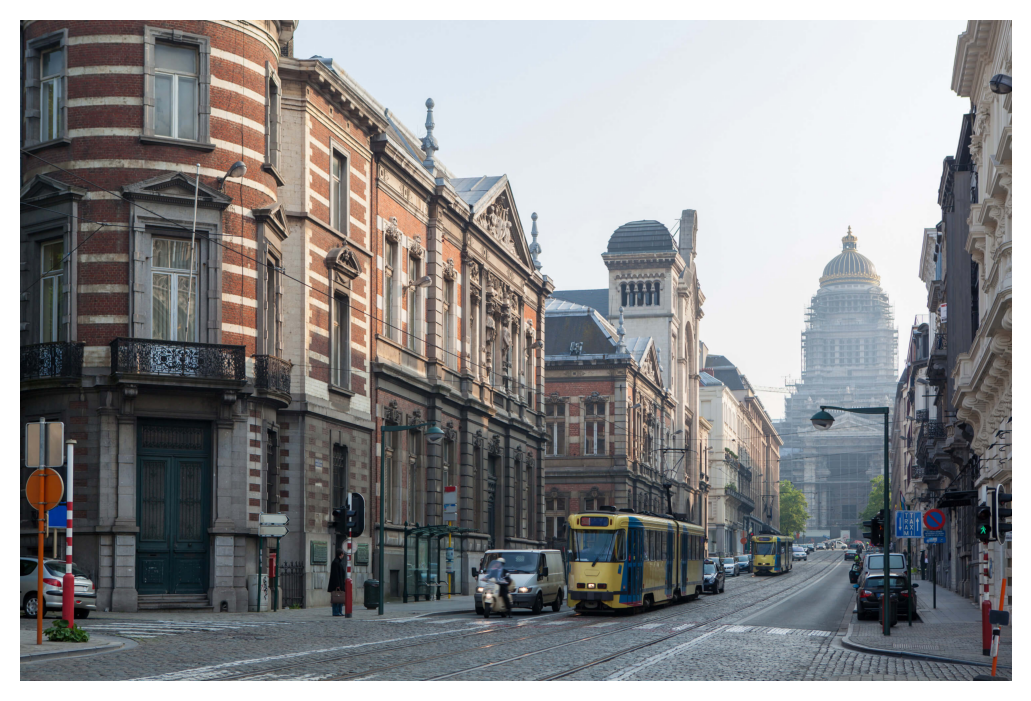

In [4]:
plt.imshow(img_array)
# remove axis
_ = plt.axis('off')

In [5]:
img_array

array([[[ 48,  51,  56],
        [ 41,  44,  49],
        [ 31,  34,  39],
        ...,
        [153, 154, 149],
        [129, 125, 116],
        [120, 112, 101]],

       [[ 47,  50,  55],
        [ 41,  44,  49],
        [ 30,  33,  38],
        ...,
        [151, 152, 147],
        [126, 122, 113],
        [117, 109,  98]],

       [[ 46,  49,  54],
        [ 39,  42,  47],
        [ 29,  32,  37],
        ...,
        [147, 148, 143],
        [121, 117, 108],
        [113, 105,  94]],

       ...,

       [[ 80,  93,  99],
        [ 85,  98, 104],
        [ 91, 104, 110],
        ...,
        [ 83,  88,  92],
        [ 85,  90,  94],
        [ 88,  93,  97]],

       [[ 69,  80,  86],
        [ 75,  86,  92],
        [ 82,  93,  99],
        ...,
        [ 86,  94,  97],
        [ 86,  94,  97],
        [ 87,  95,  98]],

       [[ 58,  65,  75],
        [ 64,  71,  81],
        [ 73,  80,  90],
        ...,
        [ 90,  98, 101],
        [ 88,  96,  99],
        [ 88,  96,  99]]

In [6]:
img_array.shape

(2000, 3000, 3)

In [7]:
img_array.dtype

dtype('uint8')

(np.float64(-0.5), np.float64(1999.5), np.float64(2999.5), np.float64(-0.5))

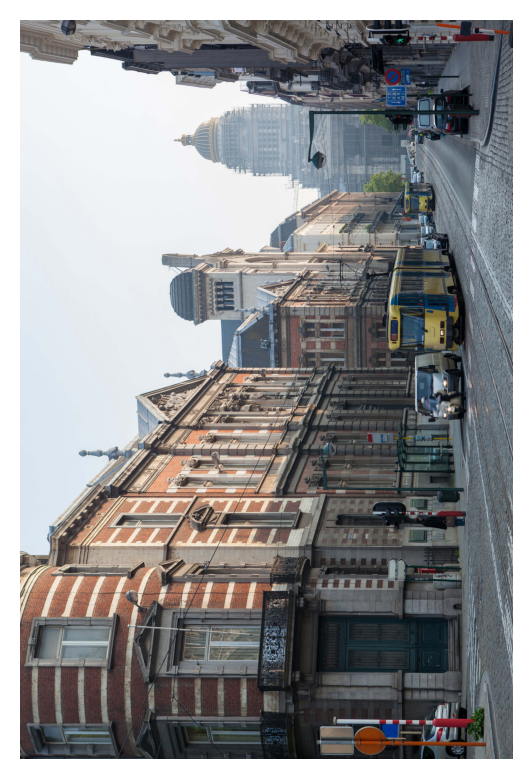

In [8]:
# rotate image by 90 degrees
rotated_img_array = np.rot90(img_array)

plt.imshow(rotated_img_array.astype(np.uint8))
plt.axis('off')

In [9]:
# 0, 0 th pixel
img_array[0, 0]

array([48, 51, 56], dtype=uint8)

(np.float64(-0.5), np.float64(2999.5), np.float64(1999.5), np.float64(-0.5))

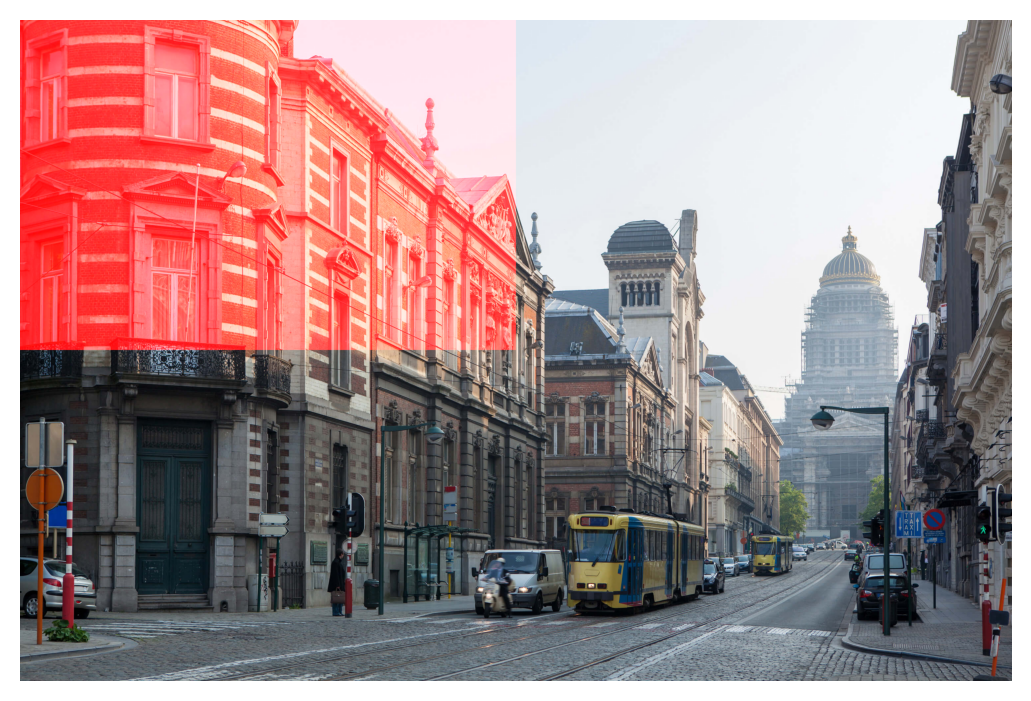

In [10]:
# Increase R value of first quarter to max
new_img = img_array.copy()
new_img[:new_img.shape[0]//2, :new_img.shape[1]//2, 0] = 255

plt.imshow(new_img)
plt.axis('off')

In [11]:
%pip install pydub -q

Note: you may need to restart the kernel to use updated packages.


In [12]:
# load audio
from email.mime import audio
from pydub import AudioSegment
audio_path = "../datasets/audio/pm-answer.mp3"


audio = AudioSegment.from_file(audio_path)


In [13]:
audio

In [14]:
audio_arr = np.array(audio.get_array_of_samples())

In [15]:
audio_arr

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

Text(0, 0.5, 'Amplitude')

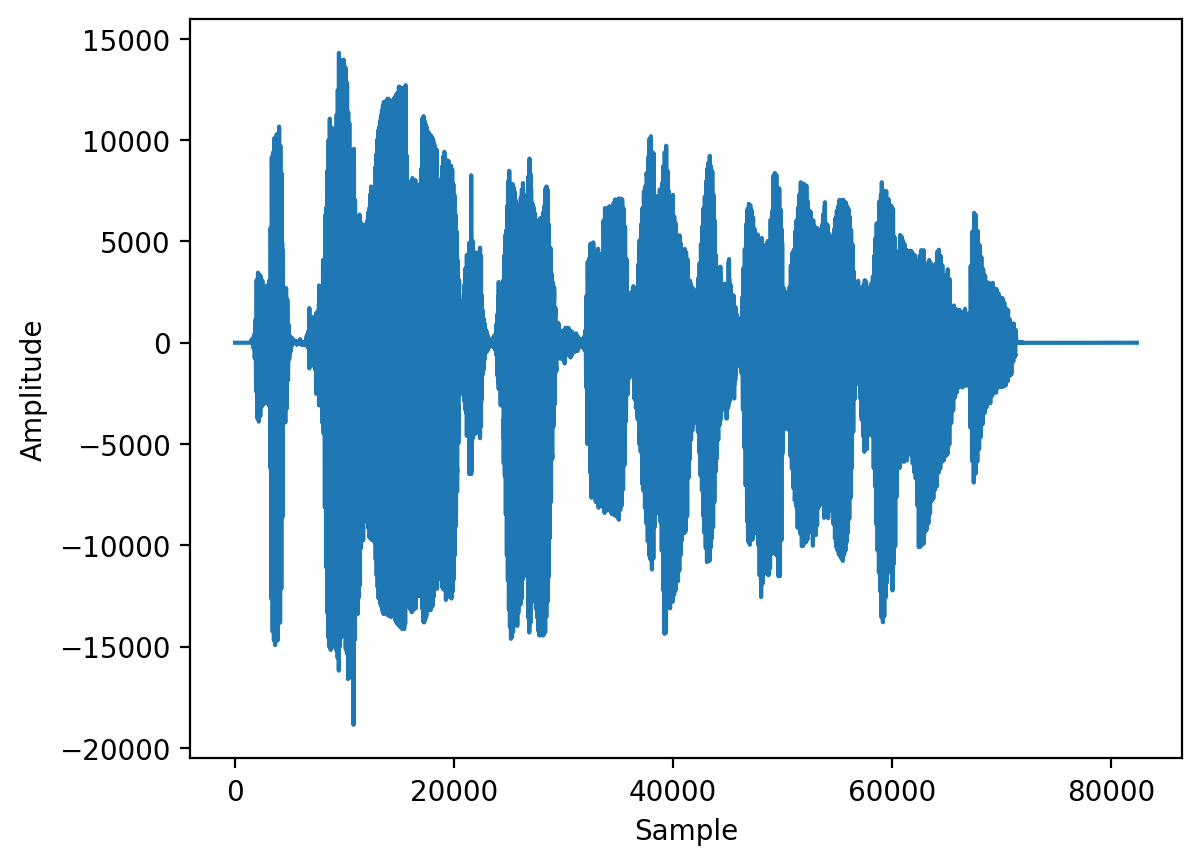

In [16]:
plt.plot(audio_arr)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

In [17]:
audio_arr.shape

(82368,)

In [18]:
audio.frame_rate

24000

Text(0, 0.5, 'Amplitude')

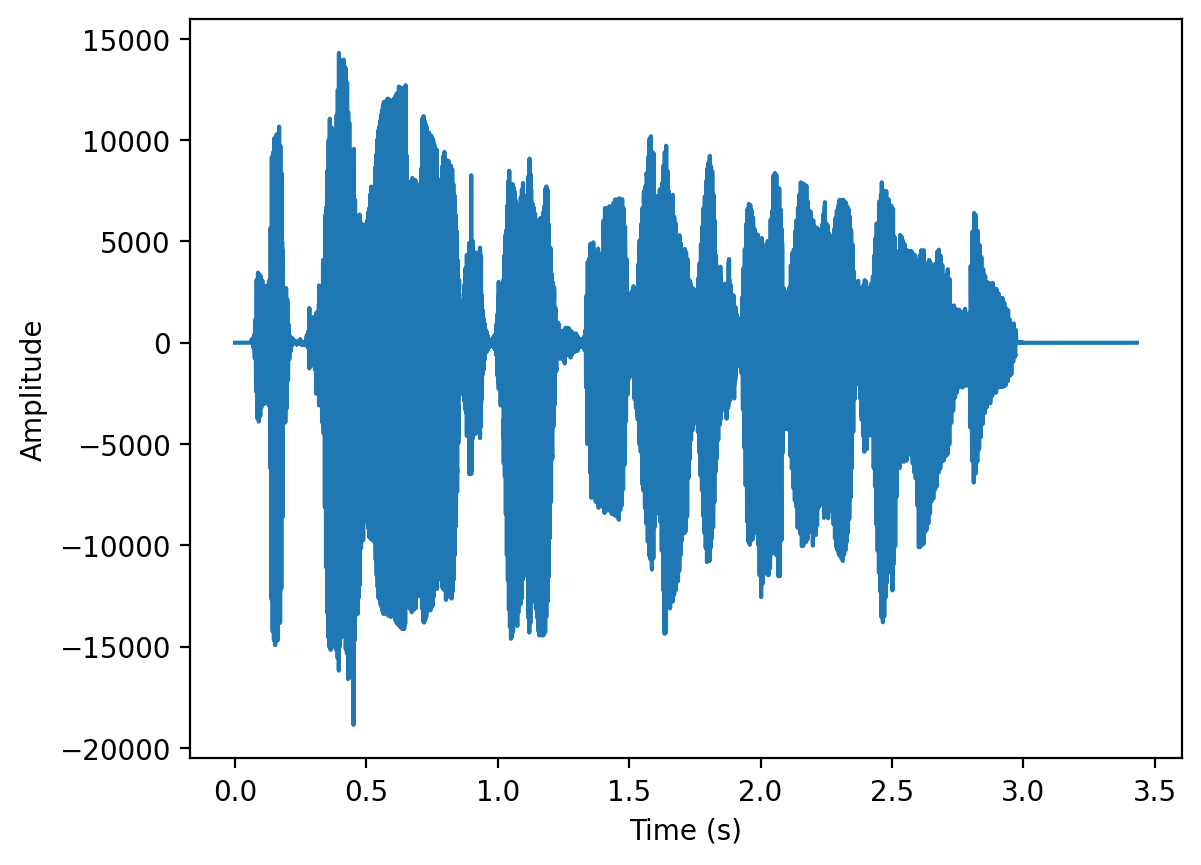

In [19]:
# Convert plot to time as x-axis
time = np.linspace(0, len(audio_arr) / audio.frame_rate, num=len(audio_arr))

plt.plot(time, audio_arr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

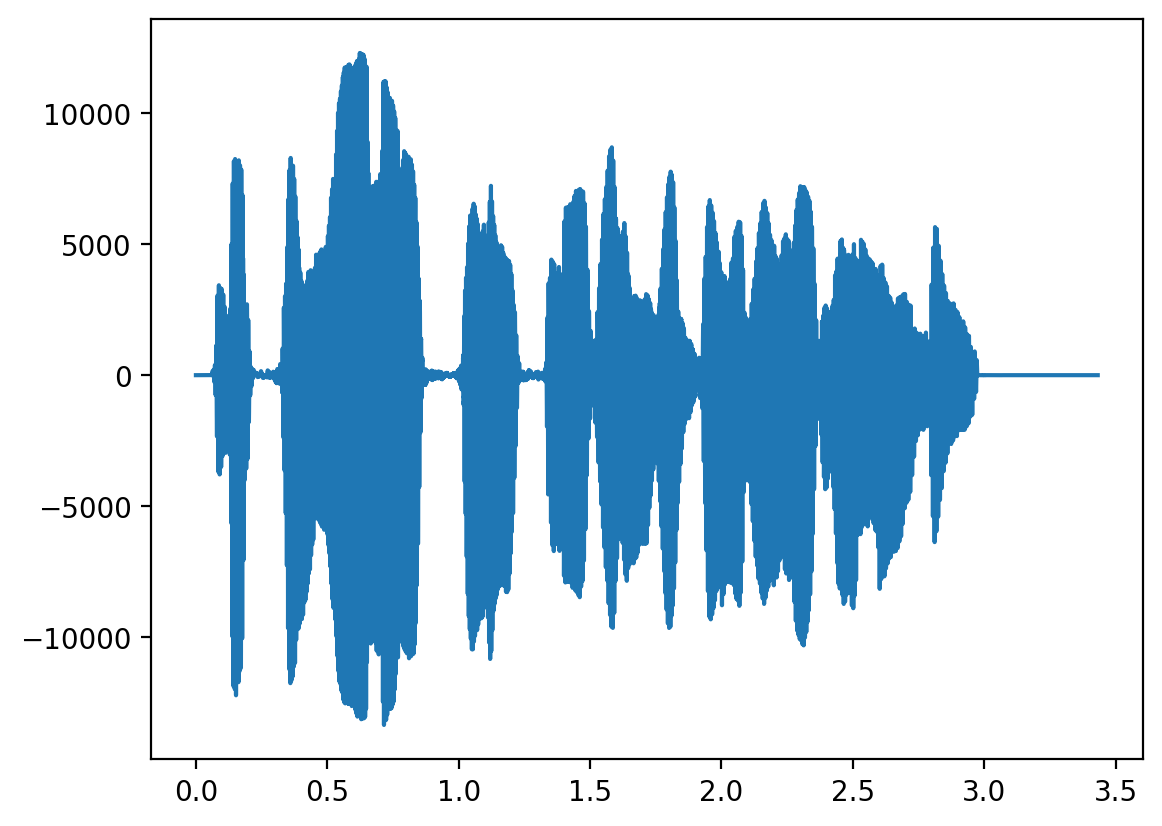

In [20]:
# Add a smoothing effect
from scipy.signal import savgol_filter

smoothed_audio_arr = savgol_filter(audio_arr, 51, 3)

plt.plot(time, smoothed_audio_arr)

In [21]:
from IPython.display import Audio
Audio(audio_arr, rate=audio.frame_rate)

In [22]:
Audio(smoothed_audio_arr, rate=audio.frame_rate)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    "The quick brown fox jumps over the lazy dog",
    "Never jump over the lazy dog quickly"
]

# Convert text to a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print("Feature names:", vectorizer.get_feature_names_out())
print("Bag-of-words representation:\n", X.toarray())

Feature names: ['brown' 'dog' 'fox' 'jump' 'jumps' 'lazy' 'never' 'over' 'quick'
 'quickly' 'the']
Bag-of-words representation:
 [[1 1 1 0 1 1 0 1 1 0 2]
 [0 1 0 1 0 1 1 1 0 1 1]]


Why not use Python lists instead of NumPy arrays?

In [24]:
import time

n_nums = 10000000
# Using a Python list
lst = list(range(n_nums))
start = time.time()
lst_squared = [x**2 for x in lst]
end = time.time()
print(f"Python list computation time: {end - start: .2f} seconds")

# Using a NumPy array
arr = np.arange(n_nums)
start = time.time()
arr_squared = arr ** 2
end = time.time()
print(f"NumPy array computation time: {end - start: .2f} seconds")

Python list computation time:  0.21 seconds
NumPy array computation time:  0.01 seconds


![](../figures/numpy-lists.png)

Import & Version Check

In [25]:
import numpy as np
print("Using NumPy version:", np.__version__)

Using NumPy version: 2.1.2


### Creating Arrays

NumPy arrays can come from Python lists or built-in functions.

In [26]:
# From a Python list
py_list = [1, 2, 3, 4]
arr_from_list = np.array(py_list)
print("Array from list:", arr_from_list)

Array from list: [1 2 3 4]


In [27]:
print(py_list)

[1, 2, 3, 4]


In [28]:
print(arr_from_list)

[1 2 3 4]


In [29]:
type(py_list), type(arr_from_list)

(list, numpy.ndarray)

In [30]:
py_list = [0, 0, 0, 0, 0, 0, 0]
np.array(py_list)

zeros_arr = np.zeros(7, dtype=np.int32)
zeros_arr, py_list

(array([0, 0, 0, 0, 0, 0, 0], dtype=int32), [0, 0, 0, 0, 0, 0, 0])

In [31]:
# Using built-in functions
zeros_arr = np.zeros((2, 3))
print("Zeros array:\n", zeros_arr)

zeros_1d = np.zeros(3)
print("1D Zeros array:", zeros_1d)

Zeros array:
 [[0. 0. 0.]
 [0. 0. 0.]]
1D Zeros array: [0. 0. 0.]


In [32]:
ones_arr = np.ones((3, 2))
print("Ones array:\n", ones_arr)

Ones array:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]


In [33]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [34]:
range_arr = np.arange(0, 10, 2)
print("range_arr =", range_arr)

range_arr = [0 2 4 6 8]


In [35]:
np.arange(0, 10, 2.5)

array([0. , 2.5, 5. , 7.5])

In [36]:
def f(x):
    return np.sin(x)

x_range = np.arange(0, 2*np.pi, 0.001)
y = f(x_range)

In [37]:
x_range

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 6.281e+00, 6.282e+00,
       6.283e+00])

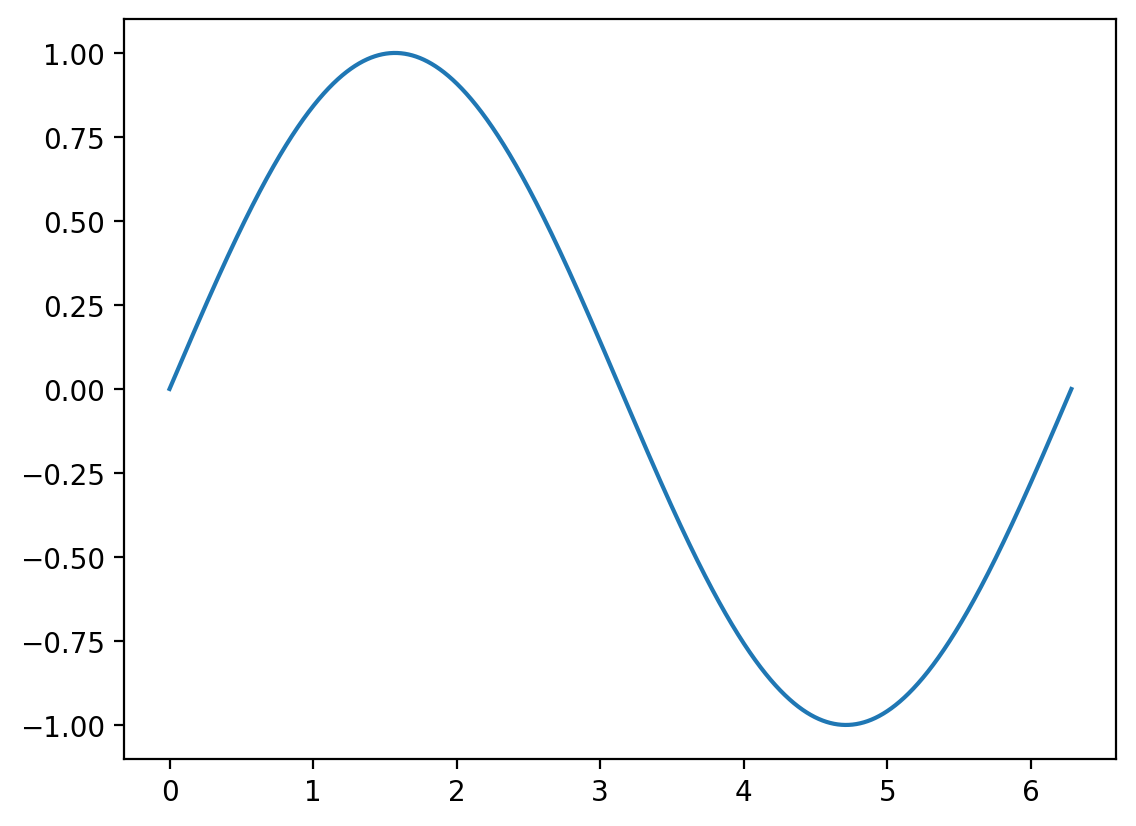

In [38]:
plt.plot(x_range, y)

In [39]:
linspace_arr = np.linspace(0, 1, 5)
print("linspace_arr =", linspace_arr)

linspace_arr = [0.   0.25 0.5  0.75 1.  ]


In [40]:
identity_mat_arr = np.eye(3)
print("Identity matrix array:\n", identity_mat_arr)

Identity matrix array:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Array Attributes
`shape`, `size`, `ndim`, and `dtype` are particularly important.

In [41]:
random_arr = np.random.randint(1, 10, size=(3,4))

print("Array:\n", random_arr)
print("Shape:", random_arr.shape)
print("Size:", random_arr.size)
print("Dimensions:", random_arr.ndim)
print("Data Type:", random_arr.dtype)

Array:
 [[1 1 2 8]
 [8 4 5 2]
 [3 2 9 8]]
Shape: (3, 4)
Size: 12
Dimensions: 2
Data Type: int64


### Taking help

? and . tab completion are useful for exploring the API.


In [42]:
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Al

In [43]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C', *, like=None)

    Return a new array of given shape and type, filled with zeros.

    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.



In [44]:
a = np.zeros((2, 3))
a.size

6

In [45]:
# Gotcha
# Shape of (N,) v/s (N, 1)

a = np.zeros(3)
print("Shape of a:", a.shape)
print("a:", a)

b = np.zeros((3, 1))
print("Shape of b:", b.shape)
print("b:\n", b)

c = np.zeros((1, 3))
print("Shape of c:", c.shape)
print("c:\n", c)

Shape of a: (3,)
a: [0. 0. 0.]
Shape of b: (3, 1)
b:
 [[0.]
 [0.]
 [0.]]
Shape of c: (1, 3)
c:
 [[0. 0. 0.]]


In above code, "a" is a vector (1d array) and "b" is a matrix (2d array) with 3 rows and 1 column; "c" is a 2d array with 1 row and 3 columns.

### Indexing & Slicing
- **Indexing** for single elements: `arr[r, c]`
- **Slicing** for subarrays: `arr[start:stop:step]`

Remember that slices in NumPy are **views**—changing a slice changes the original array.

In [46]:
# Example array
x = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
print("Original x:\n", x)

Original x:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]


In [47]:
# Accessing a single element
# If we want to select the second element of the first row, we need to specify row and column
print("Second element of the First Row:", x[0, 1])


Second element of the First Row: 20


In [48]:
# Note: We can also use x[0][1] to get the same result but it is less efficient because it first creates 
# an array containing the first row and then selects the element from that row.

print("Second element of the First Row:", x[0][1])

Second element of the First Row: 20


In [49]:
print("x = ", x)
# Slicing examples
print("x[:1] =", x[:1])  # Slices up to the first row (row index 0)
print("x[1:] =", x[1:])  # Starts slicing from the second row (row index 1)
print("x[::2] =", x[::2])  # Selects every second row (row indices 0 and 2 in this case)

x =  [[10 20 30]
 [40 50 60]
 [70 80 90]]
x[:1] = [[10 20 30]]
x[1:] = [[40 50 60]
 [70 80 90]]
x[::2] = [[10 20 30]
 [70 80 90]]


In [50]:
print("x = ", x)
# Slicing examples
print("x[:1] =", x[:1, :])  # Slices up to the first row (row index 0)
print("x[1:] =", x[1:, :])  # Starts slicing from the second row (row index 1)
print("x[::2] =", x[::2, :])  # Selects every second row (row indices 0 and 2 in this case)

x =  [[10 20 30]
 [40 50 60]
 [70 80 90]]
x[:1] = [[10 20 30]]
x[1:] = [[40 50 60]
 [70 80 90]]
x[::2] = [[10 20 30]
 [70 80 90]]


In [51]:
# Changing a view changes the original array
arr2d = np.random.randint(10, size=(4,5))
print("\narr2d:\n", arr2d)


arr2d:
 [[6 8 0 8 6]
 [2 2 3 1 5]
 [7 9 0 0 8]
 [5 1 8 6 5]]


In [52]:
sub = arr2d[:2, :3]
print("\nSubarray:", sub)


Subarray: [[6 8 0]
 [2 2 3]]


In [53]:
sub[0,0] = 99
print("\nChanged subarray => arr2d:")
print(arr2d)


Changed subarray => arr2d:
[[99  8  0  8  6]
 [ 2  2  3  1  5]
 [ 7  9  0  0  8]
 [ 5  1  8  6  5]]


In [54]:
# Create a copy of the array and then change the value

arr2d = np.random.randint(10, size=(4,5))

print("\narr2d:\n", arr2d)

arr2d_copy = arr2d[:2, :3].copy()
print("\nCopy of subarray:", arr2d_copy)

arr2d_copy[0,0] = 99

print("\nChanged copy of subarray ")
print(arr2d_copy)

print("\nSame original array => arr2d:")
print(arr2d)


arr2d:
 [[5 1 8 0 0]
 [0 1 4 6 3]
 [3 8 6 9 6]
 [3 5 2 8 3]]

Copy of subarray: [[5 1 8]
 [0 1 4]]

Changed copy of subarray 
[[99  1  8]
 [ 0  1  4]]

Same original array => arr2d:
[[5 1 8 0 0]
 [0 1 4 6 3]
 [3 8 6 9 6]
 [3 5 2 8 3]]


In [55]:
print(audio_arr), print(audio_arr.shape)
Audio(audio_arr, rate=audio.frame_rate)

[0 0 0 ... 0 0 0]
(82368,)


In [56]:
# Get last 2 seconds of audio
last_2_seconds = audio_arr[-2 * audio.frame_rate:]
Audio(last_2_seconds, rate=audio.frame_rate)

### Reshaping
Use `reshape` to change the shape without altering data.

In [57]:
grid = np.arange(1, 10)
print("Array, shape, dimensions:")
print(grid, grid.shape, grid.ndim)

Array, shape, dimensions:
[1 2 3 4 5 6 7 8 9] (9,) 1


In [58]:
grid_3x3 = grid.reshape((3,3))
print("\nArray, shape, dimensions:")
print(grid_3x3, grid_3x3.shape, grid_3x3.ndim)


Array, shape, dimensions:
[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3) 2


In [59]:
grid_temp = grid.reshape((1, 3,3))
print("\nArray, shape, dimensions:")
print(grid_temp, grid_temp.shape, grid_temp.ndim)


Array, shape, dimensions:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]] (1, 3, 3) 3


In [60]:
grid.reshape((2, 5))

ValueError: cannot reshape array of size 9 into shape (2,5)

(28, 28)


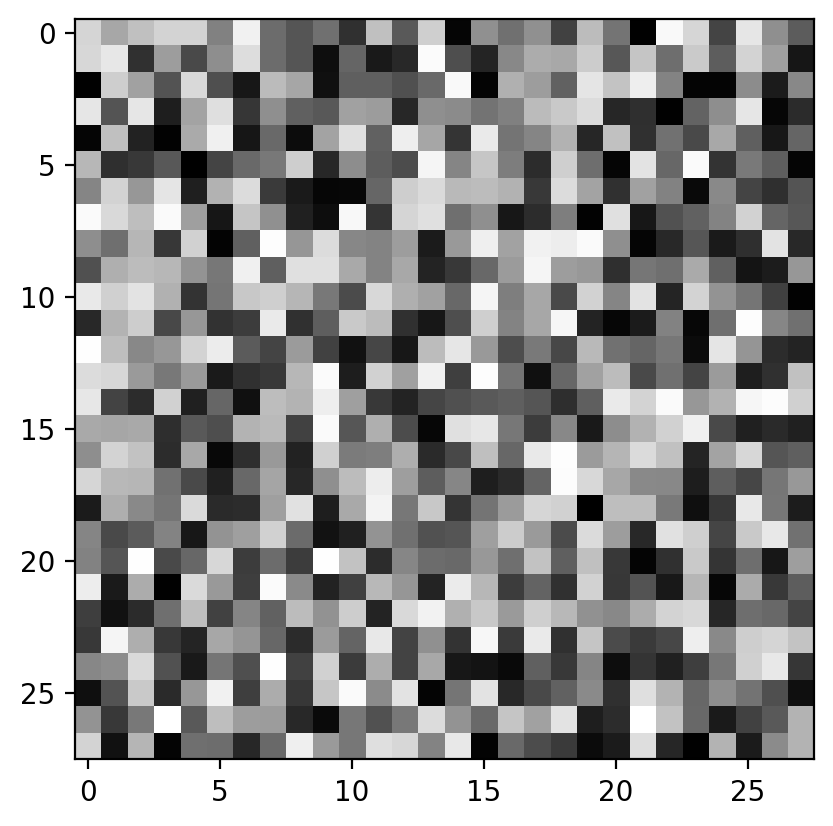

In [61]:
# Example usage 

random_2d_img = np.random.randint(0, 255, size=(28, 28))
plt.imshow(random_2d_img, cmap='gray')
print(random_2d_img.shape)

In [62]:
# Flatten the 2D image to 1D
flattened_img = random_2d_img.flatten()
print("Flattened image shape:", flattened_img.shape)


Flattened image shape: (784,)


In [63]:
N = flattened_img.size
flattened_img_using_reshape = random_2d_img.reshape(N)

print("Flattened image using reshape:", flattened_img_using_reshape.shape)

Flattened image using reshape: (784,)


In [64]:
# Using -1 in reshape
flattened_img_using_reshape = random_2d_img.reshape(-1)

print("Flattened image using reshape with -1:", flattened_img_using_reshape.shape)

Flattened image using reshape with -1: (784,)


In [65]:
flattened_img.shape

(784,)

In [66]:
# Using -1 in reshape in one dimension

two_d_img_1= flattened_img.reshape(28, -1)
print("2D image shape:", two_d_img_1.shape)

two_d_img_2 = flattened_img.reshape(-1, 28)
print("2D image shape:", two_d_img_2.shape)

# Check if two arrays are equal
np.all(two_d_img_1 == two_d_img_2)

2D image shape: (28, 28)
2D image shape: (28, 28)


np.True_

### Concatenation
`np.concatenate`, `np.vstack`, and `np.hstack` can help combine arrays.

In [67]:
arrA = np.array([1, 2, 3])
arrB = np.array([4, 5, 6])
print("Concatenate:", np.concatenate([arrA, arrB]))

gridA = np.array([[1,2],[3,4]])
gridB = np.array([[5,6],[7,8]])
print("\nVStack:\n", np.vstack([gridA, gridB]))
print("\nHStack:\n", np.hstack([gridA, gridB]))

Concatenate: [1 2 3 4 5 6]

VStack:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]

HStack:
 [[1 2 5 6]
 [3 4 7 8]]


### Universal Functions (Ufuncs)
Ufuncs are vectorized, element-by-element functions that allow fast operations on entire arrays without explicit Python loops. Each arithmetic operator (+, -, *, /, etc.) in NumPy is backed by a ufunc, and there are many more specialized ufuncs for math, stats, etc.


In [68]:
# Create a simple array
x = np.arange(5)
print("x:", x)

# Perform elementwise operations via ufuncs
y = x * 2      # multiplication
z = np.exp(x)  # exponential
print("y = x * 2:", y)
print("z = np.exp(x):", z)


x: [0 1 2 3 4]
y = x * 2: [0 2 4 6 8]
z = np.exp(x): [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


In [69]:
x_list = range(5)
mul_two = [x*2 for x in x_list]
print(mul_two)

[0, 2, 4, 6, 8]


### Aggregations
Aggregations summarize array values into a single numeric result (or one result per axis). Common examples include minimum, maximum, sum, mean, median, standard deviation, etc.

In [70]:
data = np.random.randint(1, 100, size=10)
print("data:", data)

# Basic aggregations
print("Sum:", np.sum(data))
print("Min:", np.min(data))
print("Max:", np.max(data))
print("Mean:", np.mean(data))
print("Standard Deviation:", np.std(data))


matrix = np.random.randint(0, 10, size=(3,4))
print("matrix:\n", matrix)

print("Min of each column:", np.min(matrix, axis=0))
print("Max of each row:", np.max(matrix, axis=1))


data: [38 61  9 74  1  5 60 77 71 94]
Sum: 490
Min: 1
Max: 94
Mean: 49.0
Standard Deviation: 31.849646779831012
matrix:
 [[7 1 2 5]
 [7 3 5 5]
 [9 6 1 8]]
Min of each column: [7 1 1 5]
Max of each row: [7 7 9]



### Broadcasting
Allows operations on arrays of different shapes by **stretching** dimensions when possible.

See this nice [video](https://www.youtube.com/watch?v=oG1t3qlzq14) 

In [71]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])

c = a*b
print("c = a*b:", c)
print(c.shape)

c = a*b: [2. 4. 6.]
(3,)


In [72]:
scalar = 2.0
d = a * scalar

print("d = a * scalar:", d)
print(d.shape)

d = a * scalar: [2. 4. 6.]
(3,)


In [73]:
X = np.array([[2, 6, 8], [4, 5, 3]])
print(X.shape)

Y = np.array([[2], [1]])
print(Y.shape)

Z = X + Y
print(Z.shape)

(2, 3)
(2, 1)
(2, 3)


![](../figures/numpy-broadcasting.png)

Reference: https://numpy.org/doc/stable/user/basics.broadcasting.html

In [74]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
print(a)
print(b)

# Broadcasting 
print("a + b:\n", a + b)    

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
[1. 2. 3.]
a + b:
 [[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


### Boolean Masks 
Create a mask to select certain elements.


In [75]:
data = np.random.randint(1, 20, size=10)
mask = data > 10
print("data:", data)
print("mask:", mask)
print("Values > 10:", data[mask])

data: [12  8 14  5 10 13  4 14  2  1]
mask: [ True False  True False False  True False  True False False]
Values > 10: [12 14 13 14]


### Sorting & Partitioning
- `np.sort(arr)` returns a sorted copy.
- `arr.sort()` sorts in-place.
- `np.argsort` returns the indices.


In [76]:
unsorted_arr = np.array([2,1,4,3,5])
print("Sorted copy:", np.sort(unsorted_arr))
print("Original:", unsorted_arr)

unsorted_arr.sort()
print("In-place sort:", unsorted_arr)

Sorted copy: [1 2 3 4 5]
Original: [2 1 4 3 5]
In-place sort: [1 2 3 4 5]


### Acknowledgments

Shreyans Jain, BTech IIT Gandhinagar for creating the first version of this notebook.